In [2]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Added /home/heineike/github/y1000plus_tools/ to path
Importing y1000plus_tools.py
home directory is 
y1000plus_tools dir is 
y1000plus data dir is 
Added /home/heineike/github/expression_broad_data/core/ to path
importing io_library.py
Importing io_library.  If autoreload, may need to reset base_dir and data_processing dir 
  io_library.base_dir=base_dir 
 io_library.data_processing_dir = data_processing_dir
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seq

In [ ]:
#Make list of all promoters for a selected set of species

In [3]:
#Load y1000plus species table, make species_subset table 


source_spec = 'Saccharomyces_cerevisiae'#'saccharomyces_cerevisiae'

outgroups = [ 'Hanseniaspora_vineae', 'Hanseniaspora_osmophila',
             'Wickerhamomyces_anomalus', 'Cyberlindnera_jadinii',
             'Ascoidea_rubescens',
             'Candida_albicans', 'Debaryomyces_hansenii','Metschnikowia_hawaiiensis', 
             'Komagataella_pastoris']

source_outgroups_fig2 =  [source_spec] + outgroups

genus_list = ['Kluyveromyces', 'Lachancea', 'Eremothecium', 'Ashbya', 'Torulaspora', 'Zygotorulaspora', 'Zygosaccharomyces']


y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

fig2_to_orig = dict(zip(y1000_species['species_names_fig2'], y1000_species['original_genome_id']))

y1000_pre_wgh_examples = y1000_species[(y1000_species['Genus'].isin(genus_list)) | 
                                     (y1000_species['species_names_fig2'].isin(source_outgroups_fig2))
                                    ]
#Put species in order
specs_fig2 = set(y1000_pre_wgh_examples['species_names_fig2'])

#Load full species Tree
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

#prune to desired species and put base at S.cer
t2 = t.copy()
t2.prune(specs_fig2)
root_point = t2.get_leaves_by_name("Saccharomyces_cerevisiae")[0]
t2.set_outgroup(root_point)

#Order species set using the ladderized species tree. 
specs_ordered_genome = []
specs_ordered_fig2 = []
for node in t2.iter_leaves():  
    #node.name is species_names_fig2
    #convert to original_genome_id
    genome_name = fig2_to_orig[node.name]
    if node.name in specs_fig2:
        specs_ordered_genome.append(genome_name)
        specs_ordered_fig2.append(node.name)

# #put species dataframe in order
# y1000_pre_wgh_examples.set_index('species_names_fig2', inplace=True)
# y1000_pre_wgh_examples = y1000_pre_wgh_examples.loc[specs_ordered_fig2,:].reset_index()

        

In [4]:
# #Builds datasets for all promoters from genome - only need to run once. 

# # species_names_fig = ['Torulaspora delbrueckii', 'Zygosaccharomyces bailii', 'Zygosaccharomyces rouxii', 'Zygotorulaspora florentina', 
# #  'Metschnikowia hawaiiensis', 'Kluyveromyces lactis', 'Kluyveromyces marxianus', 'Eremothecium gossypii', 
# #  'Candida albicans', 'Debaryomyces hansenii', 'Hanseniaspora vineae', 'Cyberlindnera jadinii', 
# #  'Wickerhamomyces anomalus', 'Ascoidea rubescens','Komagataella pastoris']

# #species_names_fig = ['Kluyveromyces lactis','Candida albicans'] #['Torulaspora delbrueckii', 'Zygosaccharomyces bailii', 'Zygosaccharomyces rouxii', 'Zygotorulaspora florentina', 
#  #'Metschnikowia hawaiiensis',  'Kluyveromyces marxianus', 'Eremothecium gossypii', 'Hanseniaspora vineae', 'Cyberlindnera jadinii', 
#  #'Wickerhamomyces anomalus', 'Ascoidea rubescens','Komagataella pastoris']  #'Debaryomyces hansenii', 'Candida albicans', 'Kluyveromyces lactis',

# #species_names_fig2 = ['_'.join(name.split()) for name in species_names_fig]

species_names_fig2 = ['Hanseniaspora_uvarum']#['Hanseniaspora_osmophila']#y1000_species_subset['species_names_fig2']

#genome_names = y1000_species_subset['original_genome_id']

genome_names = y1000_species[y1000_species['species_names_fig2'].isin(species_names_fig2)]['original_genome_id']

L_prom = 1000

for genome_name in genome_names: 
    print(genome_name)
    all_promoters_dir = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name) + os.sep
        
    try:
        os.mkdir(all_promoters_dir)
        fname_out = all_promoters_dir + 'all_promoters.fasta'
        y1000plus_tools.extract_all_promoters_for_spec(genome_name, L_prom, fname_out)
    except FileExistsError:
        print(os.listdir(all_promoters_dir))
        print('File already exists')
        

hanseniaspora_uvarum
0 of 4256
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1017, L_prom = 1000 length avail=161
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_102, L_prom = 1000 length avail=27
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1064, L_prom = 1000 length avail=800
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1070, L_prom = 1000 length avail=72
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1076, L_prom = 1000 length avail=-1
scaffold ends at the end of the gene, genome_name = hanseniaspora_uvarum Gene = Seq_1076
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1080, L_prom = 1000 length avail=159
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_1082, L_prom = 1000 length avail=3
promot

Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2666, L_prom = 1000 length avail=25
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2683, L_prom = 1000 length avail=1
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2684, L_prom = 1000 length avail=658
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2687, L_prom = 1000 length avail=910
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2706, L_prom = 1000 length avail=10
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2728, L_prom = 1000 length avail=97
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2786, L_prom = 1000 length avail=17
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_2787, L_prom = 1000 length avail=3
promo

promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4026, L_prom = 1000 length avail=581
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4028, L_prom = 1000 length avail=1
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4095, L_prom = 1000 length avail=679
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_411, L_prom = 1000 length avail=19
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4117, L_prom = 1000 length avail=13
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4121, L_prom = 1000 length avail=1
promoter region extends past the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_4133, L_prom = 1000 length avail=1
Promoter region extendspast the scaffold, genome_name = hanseniaspora_uvarum Gene = Seq_423, L_prom = 1000 length avail=551
Promot

In [109]:
# #builds file for all ca_promoters using pickle database I have
# ca_promoters = pd.read_pickle(base_dir + os.path.normpath('data/Calb_promoters/Calb_promoters.pkl'))

# genome_name = 'candida_albicans'
# gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
# gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
# gene_id_y1000_id_lookup = dict(zip(gene_lookup_spec['gene_id'], gene_lookup_spec.index))

# with open(home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta'),'w') as f:
#     for gene_id, prom_seq in dict(ca_promoters['prom_seq']).items():
#         y1000_id = 'NONE'
#         if gene_id in gene_id_y1000_id_lookup.keys():
#             y1000_id = gene_id_y1000_id_lookup[gene_id]
#         f.write('>' + genome_name + '@' + gene_id + ' y1000_id=' + y1000_id + ' L=' + str(len(prom_seq)) + '\n')
#         f.write(prom_seq + '\n')  #I wonder why some of the bases were in lower case



In [153]:
#Make goi_og lookup (from S.Cer y1000_id to orthogroup) and og_genes lookup (for og to genes in a set of species)


#Load GOI ohnolog data
fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

gois = list(ohnologs_goi['sc_genename_low']) + list(ohnologs_goi['sc_genename_high'])

#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]


#Make a goi_og lookup
goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_pre_wgh_examples)

more than one goi in same orthogroup :OG1000 found_genes: 
['110_469', '110_4139']
more than one goi in same orthogroup :OG1013 found_genes: 
['110_3497', '110_3578', '110_3106', '110_3996']
more than one goi in same orthogroup :OG1023 found_genes: 
['110_2443', '110_1252']
more than one goi in same orthogroup :OG1026 found_genes: 
['110_3034', '110_4525']
more than one goi in same orthogroup :OG1070 found_genes: 
['110_3608', '110_1743']
more than one goi in same orthogroup :OG1085 found_genes: 
['110_3343', '110_319']
more than one goi in same orthogroup :OG1094 found_genes: 
['110_3644', '110_2164']
more than one goi in same orthogroup :OG1112 found_genes: 
['110_2384', '110_3660']
more than one goi in same orthogroup :OG1127 found_genes: 
['110_1570', '110_242']
more than one goi in same orthogroup :OG1137 found_genes: 
['110_1909', '110_5400']
more than one goi in same orthogroup :OG1193 found_genes: 
['110_4425', '110_757']
more than one goi in same orthogroup :OG1199 found_genes

In [161]:
#Make a dataframe with number of orthologs and ids of orthologs for all gois. 

ohnologs_goi_names = ohnologs_goi.loc[:,['sc_genename_low','SC_common_name_low', 'sc_genename_high','SC_common_name_high']]

#Set of four
#['110_3106', '110_3497', '110_3578', '110_3996']

og_list = []
y1000_ids_low = []
y1000_ids_high = []

N_orths_gois = {spec + '_N_orth':[] for spec in y1000_pre_wgh_examples['species_names_fig2'] }
orths_gois = {spec + '_y1000id':[] for spec in y1000_pre_wgh_examples['species_names_fig2'] }

for ind, (genename_low, common_name_low, genename_high, common_name_high) in ohnologs_goi_names.iterrows():
    y1000_id_low = y1000_ids[genename_low]
    y1000_ids_low.append(y1000_id_low)
    y1000_id_high = y1000_ids[genename_high]
    y1000_ids_high.append(y1000_id_high)
    
    #If orthologs have two differnt orthogroups, I combine those
    if goi_og_lookup[y1000_id_low]!=goi_og_lookup[y1000_id_high]:
        print('two different orthogroups ' + common_name_low + ', ' + common_name_high)
        ogs = [goi_og_lookup[y1000_id_low], goi_og_lookup[y1000_id_high]]
    
    else: 
        ogs = [goi_og_lookup[y1000_id_low]]
    
    og_list.append(ogs)
    
    #count number of genes in ogs for each goi
    genes = []
    for og in ogs: 
        genes = genes + list(og_genes_lookup[og])
      
    specs_in_genes = [y1000_id.split('_')[0] for y1000_id in genes]
    
    genes_specs_df = pd.DataFrame({'specs':specs_in_genes,'genes':genes})
  
    gene_counter = Counter(specs_in_genes)
    for ind, (spec, spec_og_id) in y1000_pre_wgh_examples.loc[:,['species_names_fig2', 'spec_og_id']].iterrows():
        N_orths_gois[spec + '_N_orth'].append(gene_counter[str(spec_og_id)])
        orths_gois[spec + '_y1000id'].append(list(genes_specs_df[genes_specs_df['specs']==str(spec_og_id)]['genes']))
    
        
    
        
goi_pre_WGH_orths = ohnologs_goi.loc[:,['Ancestor', 'AA %id', 'Length Ratio','sc_genename_low','SC_common_name_low', 'sc_genename_high','SC_common_name_high']]
goi_pre_WGH_orths['y1000_id_low']= y1000_ids_low
goi_pre_WGH_orths['y1000_id_high']= y1000_ids_high
goi_pre_WGH_orths['high_low'] = goi_pre_WGH_orths['SC_common_name_high'] + '_' + goi_pre_WGH_orths['SC_common_name_low']
goi_pre_WGH_orths['ogs']= og_list
for spec in specs_ordered_fig2:
    goi_pre_WGH_orths[spec + '_N_orth']=N_orths_gois[spec + '_N_orth']
    goi_pre_WGH_orths[spec + '_y1000id'] = orths_gois[spec + '_y1000id']
goi_pre_WGH_orths.set_index('high_low', inplace=True)


two different orthogroups YDR524C-B, YCL048W-A
two different orthogroups GZF3, DAL80
two different orthogroups YJR054W, PRM6
two different orthogroups CNM67, ADY3
two different orthogroups VPS21, YPT53
two different orthogroups POR2, POR1
two different orthogroups YMR124W, YLR031W
two different orthogroups SEC14, YKL091C
two different orthogroups YBR056W-A, YDR034W-B
two different orthogroups FHN1, NCE102
two different orthogroups SDT1, PHM8
two different orthogroups VRG4, HVG1
two different orthogroups YGR035C, YLR346C
two different orthogroups SCM4, ATG33
two different orthogroups PEX21, PEX18
two different orthogroups YKR075C, YOR062C
two different orthogroups YLR297W, YOR186W
two different orthogroups CUP9, TOS8
two different orthogroups RGM1, USV1
two different orthogroups YCR075W-A, YNR034W-A
two different orthogroups FRT1, FRT2
two different orthogroups YOL036W, YIR016W
two different orthogroups SKT5, SHC1
two different orthogroups SCS2, SCS22
two different orthogroups YER158C, 

In [175]:
goi_pre_WGH_orths.to_csv(home_dir + os.path.normpath('github/expression_broad_data/expression_data/kl_sc_PKA_as_m24_r1g1_20181017/20190603_y1000_orths_goi.csv'))

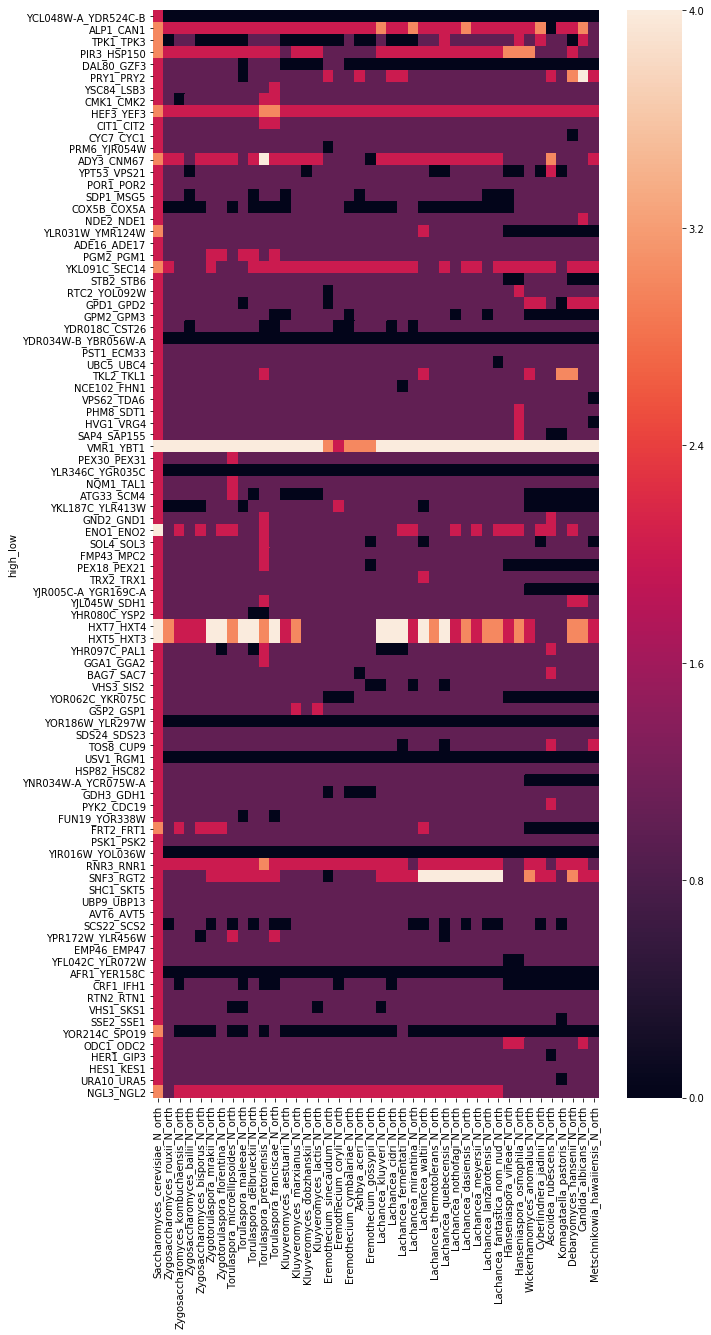

In [162]:
#Plot number of genes for each of the pre WGH species for each goi pair
fig, ax = plt.subplots(1,1,figsize=(10,20))

N_orth_matrix = goi_pre_WGH_orths.loc[:,[spec + '_N_orth' for spec in specs_ordered_fig2]]
sns.heatmap(N_orth_matrix, ax=ax, vmax=4)

In [145]:
#N_orth_matrix.loc['HXT7_HXT4',:]

In [163]:
# #Filter out all rows in which:
# 1) There are 0 orthologs
# 2) More than 8 species have more than 1 ortholog


print('Following pairs filtered out because they had no orthologs in the other species')
print(list(N_orth_matrix[N_orth_matrix.sum(axis=1)<=2].index))
N_orth_matrix_low_filt = N_orth_matrix[N_orth_matrix.sum(axis=1)>2]

duplicate_threshold = 8 #used 5 for smaller list of species
high_filt = []
for jj, counts in N_orth_matrix_low_filt.loc[:,N_orth_matrix.columns[1:]].iterrows():
    N_orth_counter = Counter(list(counts))
    N_orth_inds_gt_one = [count for count in list(N_orth_counter.keys()) if count>1]
    
    #find number of species that have an ortholog count greater than one
    N_specs_N_orth_gt_one = 0
    for nn in N_orth_inds_gt_one: 
        N_specs_N_orth_gt_one = N_specs_N_orth_gt_one + N_orth_counter[nn]
    test = N_specs_N_orth_gt_one<duplicate_threshold
    high_filt.append(test) 
    if not(test):
        print(jj + ' filtered out because more than ' + str(duplicate_threshold) + ' species had more than one ortholog for the gene.')
N_orth_matrix_lhfilt = N_orth_matrix_low_filt[high_filt]

goi_pre_WGH_orths_lhfilt=goi_pre_WGH_orths.loc[N_orth_matrix_lhfilt.index,:]



Following pairs filtered out because they had no orthologs in the other species
['YCL048W-A_YDR524C-B', 'YDR034W-B_YBR056W-A', 'YLR346C_YGR035C', 'YOR186W_YLR297W', 'USV1_RGM1', 'YIR016W_YOL036W', 'AFR1_YER158C']
ALP1_CAN1 filtered out because more than 8 species had more than one ortholog for the gene.
PIR3_HSP150 filtered out because more than 8 species had more than one ortholog for the gene.
PRY1_PRY2 filtered out because more than 8 species had more than one ortholog for the gene.
HEF3_YEF3 filtered out because more than 8 species had more than one ortholog for the gene.
ADY3_CNM67 filtered out because more than 8 species had more than one ortholog for the gene.
YKL091C_SEC14 filtered out because more than 8 species had more than one ortholog for the gene.
VMR1_YBT1 filtered out because more than 8 species had more than one ortholog for the gene.
ENO1_ENO2 filtered out because more than 8 species had more than one ortholog for the gene.
HXT7_HXT4 filtered out because more than 8 s

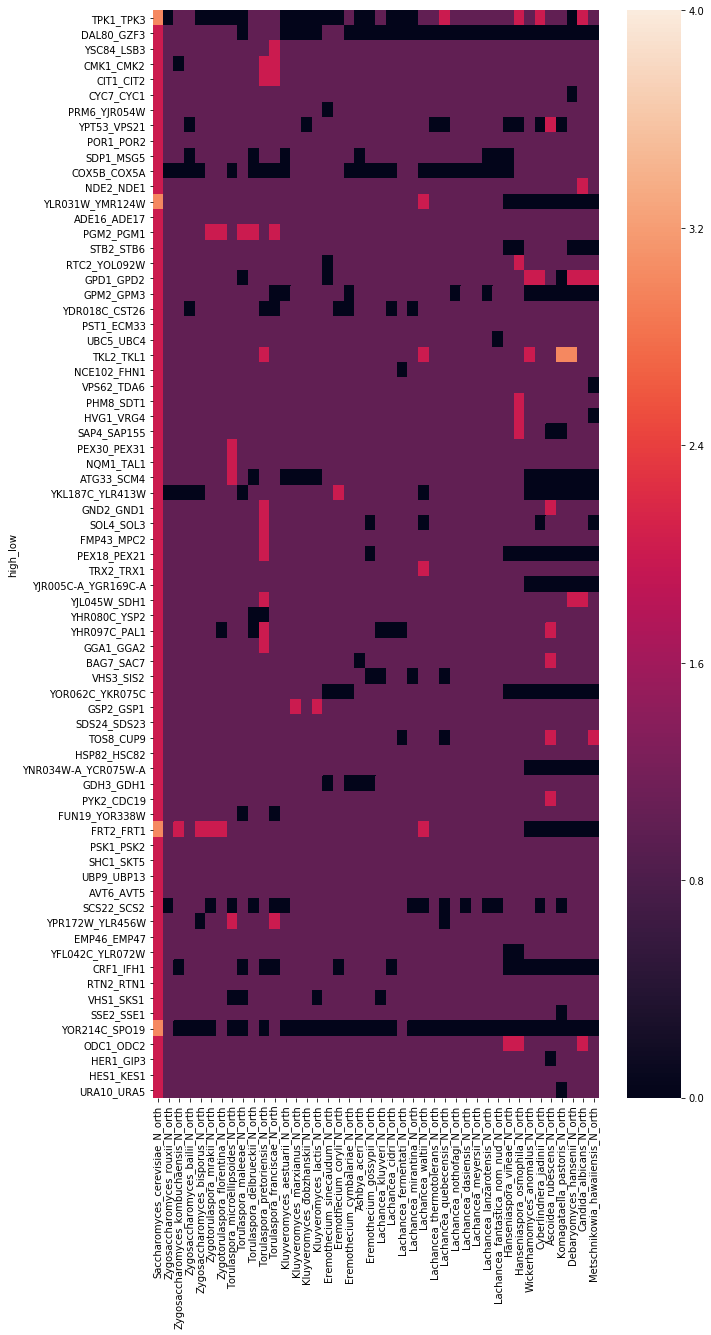

In [164]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.heatmap(N_orth_matrix_lhfilt, ax=ax, vmax=4)

In [168]:
len(y1000_pre_wgh_examples)

42

In [170]:
spec_set_df = y1000_pre_wgh_examples[y1000_pre_wgh_examples['species_names_fig2']!=source_spec]

41

In [171]:
## K.Lac - maybe use older database, and integrate PKAinh_act
## C. Albicans - need to adjust lookup index so that works

#Make prom_hits_pre_WGH
#Keys: species
#    Keys: all, DE_pka
#          Pandas Dataframe with STRE, TATA, PDS, counts and full_features
# Save as pickle and open and visualize on the other side. 


#Build promhits data for all genes, genes activated by PKA inhibition (S.Cer, K.Lac), DEpka + orthologs (could also do de stress)

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2  

#rule for choosing which gene to count when there are two orthologs for one gene
rule = 'max_STRE'

spec_set_name = 'Pre_WGH'


#drop S.Cer from species set
spec_set_df = y1000_pre_wgh_examples[y1000_pre_wgh_examples['species_names_fig2']!=source_spec]

prom_hits = {}

prom_hits_subset= {}
chosen_orths = {}

#spec = 'Metschnikowia_hawaiiensis'#'Torulaspora_delbrueckii'
for spec, genome_name in zip(spec_set_df['species_names_fig2'], spec_set_df['original_genome_id']) : 

    print(spec)
#     genome_name = spec_set_df[spec_set_df['species_names_fig2']==spec]['original_genome_id'].values[0]

    #make gene_id lookup for the species
    gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
    gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
    y1000_id_gene_id_lookup = dict(gene_lookup_spec['gene_id'])

    #load all promoters for the species
    all_promoters_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')
    all_promoters = SeqIO.to_dict(SeqIO.parse(all_promoters_fname, "fasta"))  

    #prom_set_names = ['all','DEpka']

    ## if prom_set_name=='all':
    # do normal promoter finding with all genes


    #     'Kluyveromyces lactis'
    #     SC_KL_abbrev = {'Scer':'SC', 'Klac':'KL'}
    #     if spec in {'Scer', 'Klac'}: 
    #         prom_set_names = prom_set_names + ['pka_inh']
    #         pkainh_act_genes = target_sets_dict[SC_KL_abbrev[spec]][0]['pkainh_act']

    #all promoters, pka_inhibition (SC,KL only), DEpka orthologs, build PromHits object
    #Identify genenames to extract
    prom_hits_spec_subset = {}

    prom_set_name='all'
    gene_list = all_promoters.keys()#prom_hits_spec_level[prom_set_name]=io_library.exact_promoter_scan_from_fasta(all_promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom) 
    prom_hits_spec_subset[prom_set_name] = io_library.exact_promoter_scan_genelist_dict(gene_list, all_promoters, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom)
    #         elif prom_set_name=='pka_inh':
    #             gene_list = pkainh_act_genes
    
    prom_set_name='DEpka'
    #get ortholog list
    gene_list_orths = goi_pre_WGH_orths_lhfilt[spec + '_y1000id']
    possible_orths = list(chain.from_iterable(list(gene_list_orths)))

    #make dictionary from y1000id to promoter to pass into promoter scan function for DEpka genes
    y1000_prom_dict = {}
    for y1000_id in possible_orths: 
        gene_id = y1000_id_gene_id_lookup[y1000_id]
        y1000_prom_dict[y1000_id]=all_promoters[genome_name + '@' + gene_id]

    output_df, chosen_orths_spec = io_library.exact_promoter_scan_genelist_orths_dict(gene_list_orths, rule, y1000_prom_dict, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom)
    prom_hits_spec_subset[prom_set_name] = output_df
    
    prom_hits_subset[spec]=prom_hits_spec_subset
    chosen_orths[spec]=chosen_orths_spec


Candida_albicans
Debaryomyces_hansenii
Metschnikowia_hawaiiensis
Ascoidea_rubescens
Komagataella_pastoris
Cyberlindnera_jadinii
Wickerhamomyces_anomalus
Kluyveromyces_dobzhanskii
Kluyveromyces_aestuarii
Eremothecium_gossypii
Ashbya_aceri
Eremothecium_sinecaudum
Eremothecium_cymbalariae
Eremothecium_coryli
Kluyveromyces_lactis
Kluyveromyces_marxianus
Lachancea_fantastica_nom_nud
Lachancea_meyersii
Lachancea_nothofagi
Lachancea_cidri
Lachancea_thermotolerans
Lachancea_mirantina
Lachancea_dasiensis
Lachancea_fermentati
Lachancea_kluyveri
Lachancea_lanzarotensis
Lachancea_quebecensis
Torulaspora_delbrueckii
Torulaspora_maleeae
Torulaspora_pretoriensis
Torulaspora_microellipsoides
Zygosaccharomyces_rouxii
Zygosaccharomyces_bailii
Zygosaccharomyces_bisporus
Zygotorulaspora_florentina
Zygotorulaspora_mrakii
Hanseniaspora_vineae
Lachancea_waltii
Torulaspora_franciscae
Zygosaccharomyces_kombuchaensis
Hanseniaspora_osmophila


In [126]:
goi_pre_WGH_orths_lhfilt.loc['SOL4_SOL3',:]

Ancestor                                               Anc_5.78
AA %id                                                      48%
Length Ratio                                               0.98
sc_genename_low                                         YHR163W
SC_common_name_low                                         SOL3
sc_genename_high                                        YGR248W
SC_common_name_high                                        SOL4
y1000_id_low                                           110_1058
y1000_id_high                                          110_4019
ogs                                                    [OG3991]
Saccharomyces_cerevisiae_N_orth                               2
Saccharomyces_cerevisiae_y1000id           [110_1058, 110_4019]
Zygosaccharomyces_rouxii_N_orth                               1
Zygosaccharomyces_rouxii_y1000id                     [342_4125]
Zygosaccharomyces_kombuchaensis_N_orth                        1
Zygosaccharomyces_kombuchaensis_y1000id 

In [173]:
prom_hits_pre_WGH = prom_hits_subset
prom_hits_pre_WGH_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/prom_hits_pre_WGH.pkl')
with open(prom_hits_pre_WGH_fname, 'wb') as f:
    pickle.dump((prom_hits_pre_WGH, chosen_orths, goi_pre_WGH_orths_lhfilt, specs_ordered_fig2), f)

home directory is 
y1000plus_tools dir is 
y1000plus data dir is 
